In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
#reading csv file
df = pd.read_csv('C:/Users/Chinmayee/Music/heart_disease.csv')
df = df.dropna()
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['target'], axis=1))
print(X)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


In [6]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)
print(labels)

[0 1 1 ... 1 0 1]


In [7]:
labeled_data = pd.DataFrame({'patient_id': df.index, 'Label': labels})
print(labeled_data.head())

   patient_id  Label
0           0      0
1           1      1
2           2      1
3           3      0
4           4      1


In [19]:
df['cluster'] = kmeans.labels_

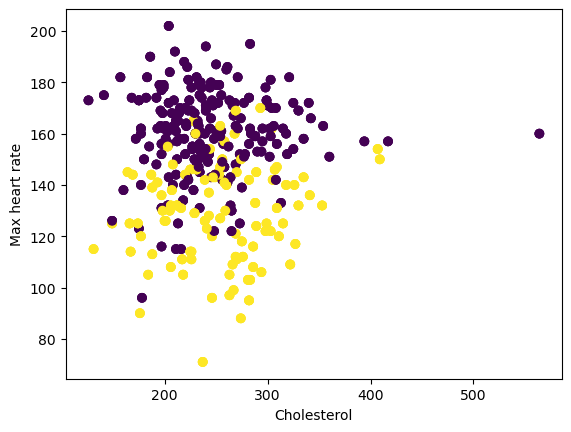

In [20]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(df['chol'], df['thalach'], c=df['cluster'], cmap='viridis')
plt.xlabel('Cholesterol')
plt.ylabel('Max heart rate')
plt.show()

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['X'], df['y'], c=df['cluster'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('y')
plt.show()





KeyError: 'X'

## Supervised Learning

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), labeled_data['Label'], test_size=0.2, random_state=0)
# print(X_train.head(2))
# print(X_test.head(2))
# print(y_train.head(2))
print(y_test.head(2))

807    0
27     0
Name: Label, dtype: int32


In [10]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_pred = rfc.predict(X_test)

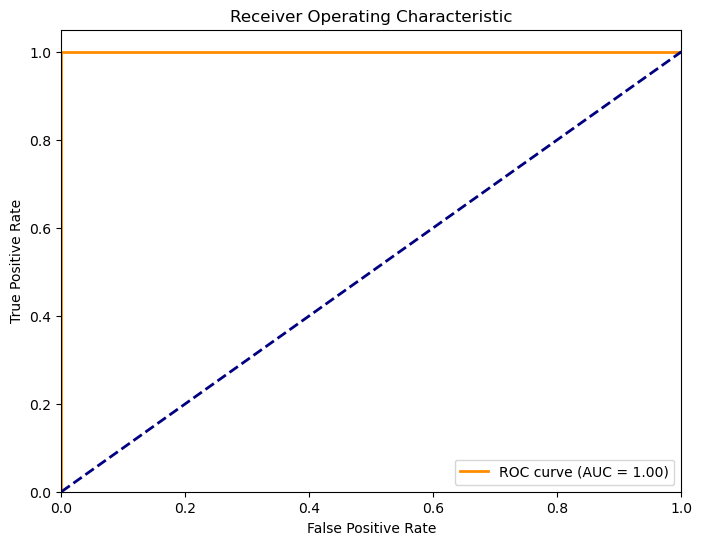

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


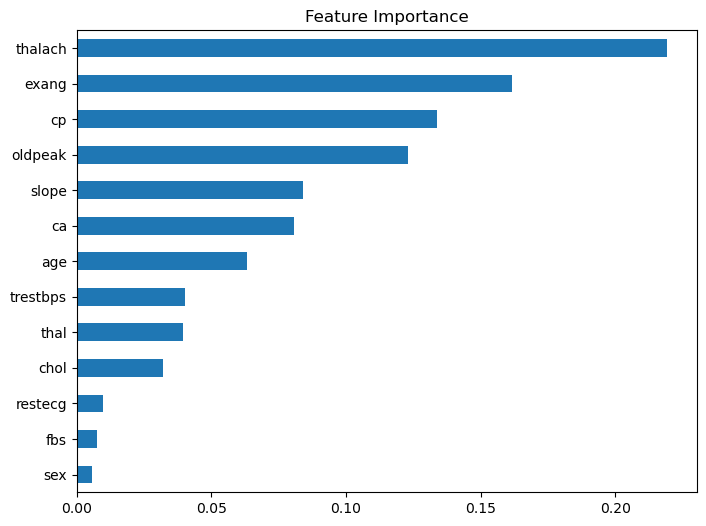

In [16]:
importances = pd.Series(rfc.feature_importances_, index=df.drop(['target'], axis=1).columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.show()